In [1]:
import os
from sys import argv, stdout, stderr
from ROOT import TFile, gROOT, TCanvas, TLegend
import sys                                                                                                                                                                                                                                                  
gROOT.SetStyle("Plain")                                                                                                                                                                                                                                           
gROOT.SetBatch(True)

Welcome to JupyROOT 6.12/07


In [4]:
def positivize(histogram):                                                                                                                                                                                                                                                      
    output = histogram.Clone()                                                                                                                                                                                                                                                  
    for i in range(output.GetSize()):                                                                                                                                                                                                                                           
        if output.GetArray()[i] < 0:                                                                                                                                                                                                                                            
            output.AddAt(0, i)                                                                                                                                                                                                                                                  
    return output

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


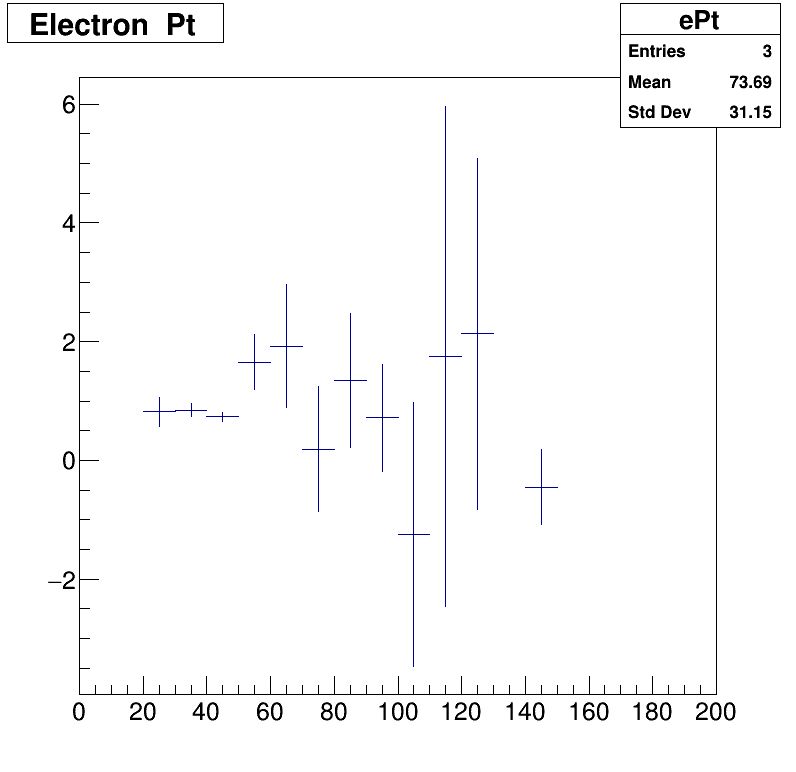

In [5]:
canvas = TCanvas("canvas","canvas",800,800)
fdata = TFile('QCD_Pt-20toInf_MuEnrichedPt15_TuneCP5_13TeV_pythia8_v14-v1.root')
fdy = TFile('DY.root')
fmc = TFile('MC.root')

hdata = fdata.Get('TightOS/ePt')

hdy = fdy.Get('TightOS/ePt')
hdyt = fdy.Get('TauLooseOS/ePt')
hdye = fdy.Get('EleLooseOS/ePt')
hdyet = fdy.Get('EleLooseTauLooseOS/ePt')
hdyf = hdyt.Clone()
hdyf.Add(hdye)
hdyf.Add(hdyet, -1)
hdyf = positivize(hdyf)
hd = hdy.Clone()
hd.Add(hdyf, -1)

htau = fdata.Get('TauLooseOS/ePt')
hele = fdata.Get('EleLooseOS/ePt')
het = fdata.Get('EleLooseTauLooseOS/ePt')
hf = htau.Clone()
hf.Add(hele)
hf.Add(het, -1)

hmc = fmc.Get('TightOS/ePt')
hmct = fmc.Get('TauLooseOS/ePt')
hmce = fmc.Get('EleLooseOS/ePt')
hmcet = fmc.Get('EleLooseTauLooseOS/ePt')
hmcf = hmct.Clone()
hmcf.Add(hmce)
hmcf.Add(hmcet, -1)
hmcf = positivize(hmcf)
hm = hmc.Clone()
hm.Add(hmcf, -1)

hb = hm.Clone()
hb.Add(hf)

hed = hdata.Clone()
hed.Add(hb, -1)
hed.Divide(hd)

hdata.Delete()
hmc.Delete()
hmct.Delete()
hmce.Delete()
hmcet.Delete()
hmcf.Delete()
hm.Delete()
hdy.Delete()
hdyt.Delete()
hdye.Delete()
hdyet.Delete()
hdyf.Delete()
hd.Delete()
htau.Delete()
hele.Delete()
het.Delete()
hf.Delete()
hb.Delete()

f = TFile('Pt.root',"RECREATE")
f.cd()
hed.Draw()
#print h.GetBinContent(19)
#print h.GetXaxis().FindBin(-2.1)
canvas.Draw()
hed.Write()
f.Close()